<a href="https://colab.research.google.com/github/pyrated03/IISc-Incremental-Learning/blob/main/CAVR_via_DRML_Naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: [Handwritten Digit Recognition Using PyTorch — Intro To Neural Networks](https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# !unzip /content/drive/MyDrive/IISc\ Internship/MNIST\ Data/MNIST\ Data.zip -d /content/drive/MyDrive/IISc\ Internship/MNIST\ Data

### Necessary Imports

In [4]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
import os

### Download The Dataset & Define The Transforms

In [5]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST("drive/My Drive/IISc Internship/MNIST_DATA/train_set/", download=True, train=True, transform=transform)
valset = datasets.MNIST("drive/My Drive/IISc Internship/MNIST_DATA/test_set/", download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting drive/My Drive/IISc Internship/MNIST_DATA/train_set/MNIST/raw/train-images-idx3-ubyte.gz to drive/My Drive/IISc Internship/MNIST_DATA/train_set/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting drive/My Drive/IISc Internship/MNIST_DATA/train_set/MNIST/raw/train-labels-idx1-ubyte.gz to drive/My Drive/IISc Internship/MNIST_DATA/train_set/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting drive/My Drive/IISc Internship/MNIST_DATA/train_set/MNIST/raw/t10k-images-idx3-ubyte.gz to drive/My Drive/IISc Internship/MNIST_DATA/train_set/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting drive/My Drive/IISc Internship/MNIST_DATA/train_set/MNIST/raw/t10k-labels-idx1-ubyte.gz to drive/My Drive/IISc Internship/MNIST_DATA/train_set/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting drive/My Drive/IISc Internship/MNIST_DATA/test_set/MNIST/raw/train-images-idx3-ubyte.gz to drive/My Drive/IISc Internship/MNIST_DATA/test_set/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting drive/My Drive/IISc Internship/MNIST_DATA/test_set/MNIST/raw/train-labels-idx1-ubyte.gz to drive/My Drive/IISc Internship/MNIST_DATA/test_set/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting drive/My Drive/IISc Internship/MNIST_DATA/test_set/MNIST/raw/t10k-images-idx3-ubyte.gz to drive/My Drive/IISc Internship/MNIST_DATA/test_set/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting drive/My Drive/IISc Internship/MNIST_DATA/test_set/MNIST/raw/t10k-labels-idx1-ubyte.gz to drive/My Drive/IISc Internship/MNIST_DATA/test_set/MNIST/raw



### Exploring The Data

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


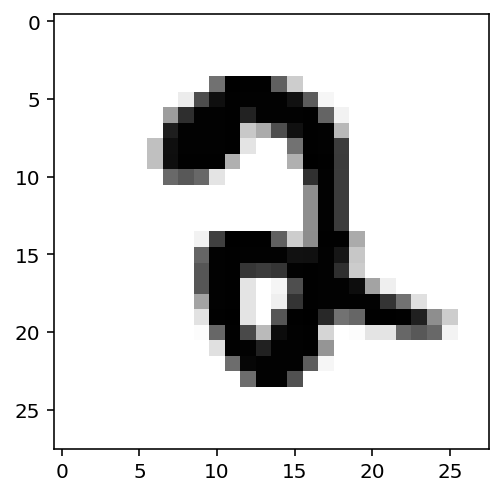

In [7]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

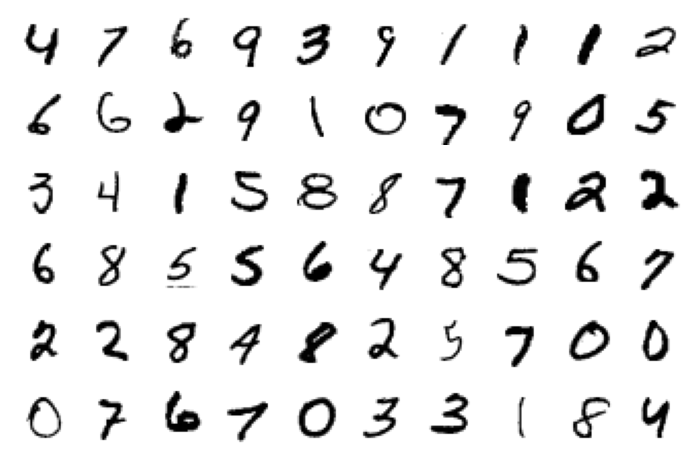

In [8]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Sequential Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [9]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model_seq = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model_seq)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


## Defining ResNet Model

In [ ]:
!pip3 install resnet_pytorch

In [ ]:
model = models.resnet18(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### **DEFINING THE FINAL LAYER FOR CLASSIFICATION**

In [ ]:
model.fc = nn.Sequential(nn.Linear(512,10)) #, nn.Softmax(7))
# model
model = model.to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [11]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images.cuda())
loss = criterion(logps, labels.cuda())

In [12]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-3.8870e-04, -3.8870e-04, -3.8870e-04,  ..., -3.8870e-04,
         -3.8870e-04, -3.8870e-04],
        [-2.0269e-04, -2.0269e-04, -2.0269e-04,  ..., -2.0269e-04,
         -2.0269e-04, -2.0269e-04],
        [-1.7762e-04, -1.7762e-04, -1.7762e-04,  ..., -1.7762e-04,
         -1.7762e-04, -1.7762e-04],
        ...,
        [ 2.9100e-05,  2.9100e-05,  2.9100e-05,  ...,  2.9100e-05,
          2.9100e-05,  2.9100e-05],
        [-2.3966e-04, -2.3966e-04, -2.3966e-04,  ..., -2.3966e-04,
         -2.3966e-04, -2.3966e-04],
        [ 1.2910e-03,  1.2910e-03,  1.2910e-03,  ...,  1.2910e-03,
          1.2910e-03,  1.2910e-03]], device='cuda:0')


In [13]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [14]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images.cuda())
loss = criterion(output, labels.cuda())
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0070,  0.0080, -0.0217,  ..., -0.0218,  0.0304, -0.0176],
        [ 0.0337,  0.0219, -0.0303,  ..., -0.0254,  0.0263,  0.0048],
        [-0.0150,  0.0348, -0.0277,  ..., -0.0231,  0.0254,  0.0010],
        ...,
        [-0.0247,  0.0161,  0.0139,  ...,  0.0014,  0.0237,  0.0266],
        [ 0.0164,  0.0099,  0.0150,  ..., -0.0126,  0.0049, -0.0286],
        [-0.0283, -0.0277,  0.0301,  ..., -0.0306,  0.0292,  0.0077]],
       device='cuda:0', requires_grad=True)
Gradient - tensor([[-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        ...,
        [ 0.0019,  0.0019,  0.0019,  ...,  0.0019,  0.0019,  0.0019],
        [ 0.0044,  0.0044,  0.0044,  ...,  0.0044,  0.0044,  0.0044],
        [ 0.0032,  0.0032,  0.0032,  ...,  0.0032,  0.0032,  0.0032]],
       device='cuda:0')


In [15]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0070,  0.0080, -0.0217,  ..., -0.0218,  0.0304, -0.0176],
        [ 0.0337,  0.0219, -0.0303,  ..., -0.0254,  0.0263,  0.0048],
        [-0.0150,  0.0348, -0.0277,  ..., -0.0231,  0.0254,  0.0010],
        ...,
        [-0.0247,  0.0161,  0.0139,  ...,  0.0013,  0.0237,  0.0266],
        [ 0.0163,  0.0098,  0.0150,  ..., -0.0127,  0.0048, -0.0287],
        [-0.0283, -0.0277,  0.0301,  ..., -0.0306,  0.0292,  0.0076]],
       device='cuda:0', requires_grad=True)


### Core Training Of Neural Network

In [16]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images.cuda())
        loss = criterion(output, labels.cuda())
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.6189201021356496
Epoch 1 - Training loss: 0.28736383366241636
Epoch 2 - Training loss: 0.2272017170458651
Epoch 3 - Training loss: 0.18328185335421232
Epoch 4 - Training loss: 0.15039160510878574
Epoch 5 - Training loss: 0.12888881167583566
Epoch 6 - Training loss: 0.11223793620748052
Epoch 7 - Training loss: 0.10048889497052758
Epoch 8 - Training loss: 0.0895217752753338
Epoch 9 - Training loss: 0.07999776799017305
Epoch 10 - Training loss: 0.0742628450484585
Epoch 11 - Training loss: 0.06751211649025364
Epoch 12 - Training loss: 0.061939627767157265
Epoch 13 - Training loss: 0.05673712789555634
Epoch 14 - Training loss: 0.052527852582810786

Training Time (in minutes) = 3.902379802862803


In [17]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 5


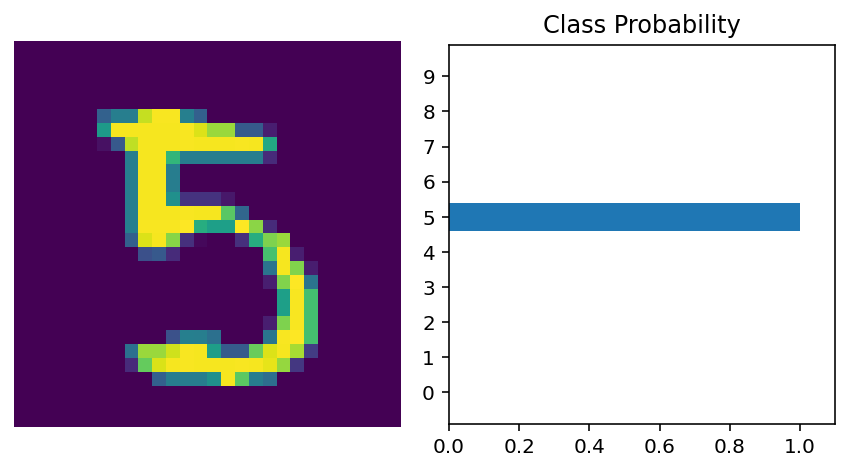

In [18]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img.cuda())

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.cpu().numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [19]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img.cuda())

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9739
